In [50]:
# Загрузка необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [51]:
# Загрузка датасета
data = pd.read_excel('C:/Users/huawei/Downloads/32_052019.xlsx')
df = data.copy()

In [52]:
# Просмотр данных
df

,Код станции отправления,Станция отправления,Регион отгрузки,Ж/Д отгрузки,Отд. ж/д отгрузки,Код станции назначения,Станция назначения,Регион поставки,Ж/Д поставки,Отд. ж/д поставки,...,Станция отправления загран,Код станции отправления загран,Станция назначения загран,Код станции назначения загран,Отч мес,Отч год,Код страны отправления,Страна отправления,Код страны назначения,Страна назначения
0,86420,НОВОКУЗНЕЦК-СЕВЕРНЫЙ,КЕМЕРОВСКАЯ ОБЛАСТЬ,Западно-Сибирская,HОВОКУЗHЕЦ-Е,84480,КУЛУНДА-ЭКСПОРТ (В КАЗ),АЛТАЙСКИЙ КРАЙ,Западно-Сибирская,АЛТАЙСКОЕ,...,НОВОКУЗ.-СЕВ,86420,БИШКЕК 1,71660,5,19,643,РОССИЯ,417,КИРГИЗИЯ
1,86420,НОВОКУЗНЕЦК-СЕВЕРНЫЙ,КЕМЕРОВСКАЯ ОБЛАСТЬ,Западно-Сибирская,HОВОКУЗHЕЦ-Е,84480,КУЛУНДА-ЭКСПОРТ (В КАЗ),АЛТАЙСКИЙ КРАЙ,Западно-Сибирская,АЛТАЙСКОЕ,...,НОВОКУЗ.-СЕВ,86420,БИШКЕК 1,71660,5,19,643,РОССИЯ,417,КИРГИЗИЯ
2,86420,НОВОКУЗНЕЦК-СЕВЕРНЫЙ,КЕМЕРОВСКАЯ ОБЛАСТЬ,Западно-Сибирская,HОВОКУЗHЕЦ-Е,84480,КУЛУНДА-ЭКСПОРТ (В КАЗ),АЛТАЙСКИЙ КРАЙ,Западно-Сибирская,АЛТАЙСКОЕ,...,НОВОКУЗ.-СЕВ,86420,БИШКЕК 1,71660,5,19,643,РОССИЯ,417,КИРГИЗИЯ
3,86420,НОВОКУЗНЕЦК-СЕВЕРНЫЙ,КЕМЕРОВСКАЯ ОБЛАСТЬ,Западно-Сибирская,HОВОКУЗHЕЦ-Е,84480,КУЛУНДА-ЭКСПОРТ (В КАЗ),АЛТАЙСКИЙ КРАЙ,Западно-Сибирская,АЛТАЙСКОЕ,...,НОВОКУЗ.-СЕВ,86420,АКЖАЙЫК,66160,5,19,643,РОССИЯ,398,КАЗАХСТАН
4,86420,НОВОКУЗНЕЦК-СЕВЕРНЫЙ,КЕМЕРОВСКАЯ ОБЛАСТЬ,Западно-Сибирская,HОВОКУЗHЕЦ-Е,84480,КУЛУНДА-ЭКСПОРТ (В КАЗ),АЛТАЙСКИЙ КРАЙ,Западно-Сибирская,АЛТАЙСКОЕ,...,НОВОКУЗ.-СЕВ,86420,АКЖАЙЫК,66160,5,19,643,РОССИЯ,398,КАЗАХСТАН
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36188,93460,МЫСОВАЯ,РЕСПУБЛИКА БУРЯТИЯ,Восточно-Сибирская,УЛАH-УДЕH-ОЕ,93320,АНГАСОЛКА,ИРКУТСКАЯ ОБЛАСТЬ,Восточно-Сибирская,УЛАH-УДЕH-ОЕ,...,00000,0,00000,0,5,19,0,РОССИЯ,0,РОССИЯ
36189,93460,МЫСОВАЯ,РЕСПУБЛИКА БУРЯТИЯ,Восточно-Сибирская,УЛАH-УДЕH-ОЕ,93460,МЫСОВАЯ,РЕСПУБЛИКА БУРЯТИЯ,Восточно-Сибирская,УЛАH-УДЕH-ОЕ,...,00000,0,00000,0,5,19,0,РОССИЯ,0,РОССИЯ
36190,94960,ЗИЛОВО,ЧИТИНСКАЯ ОБЛАСТЬ,Забайкальская,МОГОЧИHСКОЕ,95050,СБЕГА,ЧИТИНСКАЯ ОБЛАСТЬ,Забайкальская,МОГОЧИHСКОЕ,...,00000,0,00000,0,5,19,0,РОССИЯ,0,РОССИЯ
36191,65540,ИГЛИНО,РЕСПУБЛИКА БАШКОРТОСТАН,Куйбышевская,БАШКИРСКОЕ,65540,ИГЛИНО,РЕСПУБЛИКА БАШКОРТОСТАН,Куйбышевская,БАШКИРСКОЕ,...,00000,0,00000,0,5,19,0,РОССИЯ,0,РОССИЯ


In [53]:
# Просмотр колонок датасета
df.columns = df.columns.str.rstrip()
df.columns

Index(['Код станции отправления', 'Станция отправления', 'Регион отгрузки',
       'Ж/Д отгрузки', 'Отд. ж/д отгрузки', 'Код станции назначения',
       'Станция назначения', 'Регион поставки', 'Ж/Д поставки',
       'Отд. ж/д поставки', 'Код Клиента', 'Клиент', 'Код отправителя груза',
       'ОКПО отправителя', 'Отправитель', 'ФИО Руководителя Отправителя',
       'Почтовый индекс Отправителя', 'Адрес Отправителя', 'Тел. Отправителя',
       'E-mail Отправителя', 'Факс Отправителя', 'Код получателя груза',
       'ОКПО получателя', 'Получатель', 'ФИО Руководителя получателя',
       'Почтовый индекс получателя', 'Адрес получателя', 'Тел. получателя',
       'E-mail Получателя', 'Факс получателя', 'Код груза',
       'Наименование груза', 'Вес груза, тонн', 'Количество вагонов',
       'Тонно-километры', 'Дата отгрузки', 'Дата прибытия',
       'Характер перевозок', 'Станция отправления загран',
       'Код станции отправления загран', 'Станция назначения загран',
       'Код станции 

In [54]:
# Группировка данных по региону поставки и просмотр количества
df.groupby('Регион поставки').size()

Регион поставки
25060                                      11
АЛТАЙСКИЙ КРАЙ                            794
АМУРСКАЯ ОБЛАСТЬ                          270
АРХАНГЕЛЬСКАЯ ОБЛАСТЬ                     215
АСТРАХАНСКАЯ ОБЛАСТЬ                      286
                                         ... 
ЧЕЛЯБИНСКАЯ ОБЛАСТЬ                      2534
ЧЕЧЕНСКАЯ РЕСПУБЛИКА                       21
ЧИТИНСКАЯ ОБЛАСТЬ                         227
ЧУВАШСКАЯ РЕСПУБЛИКА-ЧАВАШ РЕСПУБЛИКИ     145
ЯРОСЛАВСКАЯ ОБЛАСТЬ                       213
Length: 73, dtype: int64

In [55]:
# Удаляем необходимые регионы поставки из датасета
df = df[df['Регион поставки'] != 'ГОРОД МОСКВА СТОЛИЦА РФ']
df = df[df['Регион поставки'] != 'МОСКОВСКАЯ ОБЛАСТЬ']
df = df[df['Регион поставки'] != 'ГОРОД САНКТ-ПЕТЕРБУРГ']
df

,Код станции отправления,Станция отправления,Регион отгрузки,Ж/Д отгрузки,Отд. ж/д отгрузки,Код станции назначения,Станция назначения,Регион поставки,Ж/Д поставки,Отд. ж/д поставки,...,Станция отправления загран,Код станции отправления загран,Станция назначения загран,Код станции назначения загран,Отч мес,Отч год,Код страны отправления,Страна отправления,Код страны назначения,Страна назначения
0,86420,НОВОКУЗНЕЦК-СЕВЕРНЫЙ,КЕМЕРОВСКАЯ ОБЛАСТЬ,Западно-Сибирская,HОВОКУЗHЕЦ-Е,84480,КУЛУНДА-ЭКСПОРТ (В КАЗ),АЛТАЙСКИЙ КРАЙ,Западно-Сибирская,АЛТАЙСКОЕ,...,НОВОКУЗ.-СЕВ,86420,БИШКЕК 1,71660,5,19,643,РОССИЯ,417,КИРГИЗИЯ
1,86420,НОВОКУЗНЕЦК-СЕВЕРНЫЙ,КЕМЕРОВСКАЯ ОБЛАСТЬ,Западно-Сибирская,HОВОКУЗHЕЦ-Е,84480,КУЛУНДА-ЭКСПОРТ (В КАЗ),АЛТАЙСКИЙ КРАЙ,Западно-Сибирская,АЛТАЙСКОЕ,...,НОВОКУЗ.-СЕВ,86420,БИШКЕК 1,71660,5,19,643,РОССИЯ,417,КИРГИЗИЯ
2,86420,НОВОКУЗНЕЦК-СЕВЕРНЫЙ,КЕМЕРОВСКАЯ ОБЛАСТЬ,Западно-Сибирская,HОВОКУЗHЕЦ-Е,84480,КУЛУНДА-ЭКСПОРТ (В КАЗ),АЛТАЙСКИЙ КРАЙ,Западно-Сибирская,АЛТАЙСКОЕ,...,НОВОКУЗ.-СЕВ,86420,БИШКЕК 1,71660,5,19,643,РОССИЯ,417,КИРГИЗИЯ
3,86420,НОВОКУЗНЕЦК-СЕВЕРНЫЙ,КЕМЕРОВСКАЯ ОБЛАСТЬ,Западно-Сибирская,HОВОКУЗHЕЦ-Е,84480,КУЛУНДА-ЭКСПОРТ (В КАЗ),АЛТАЙСКИЙ КРАЙ,Западно-Сибирская,АЛТАЙСКОЕ,...,НОВОКУЗ.-СЕВ,86420,АКЖАЙЫК,66160,5,19,643,РОССИЯ,398,КАЗАХСТАН
4,86420,НОВОКУЗНЕЦК-СЕВЕРНЫЙ,КЕМЕРОВСКАЯ ОБЛАСТЬ,Западно-Сибирская,HОВОКУЗHЕЦ-Е,84480,КУЛУНДА-ЭКСПОРТ (В КАЗ),АЛТАЙСКИЙ КРАЙ,Западно-Сибирская,АЛТАЙСКОЕ,...,НОВОКУЗ.-СЕВ,86420,АКЖАЙЫК,66160,5,19,643,РОССИЯ,398,КАЗАХСТАН
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36188,93460,МЫСОВАЯ,РЕСПУБЛИКА БУРЯТИЯ,Восточно-Сибирская,УЛАH-УДЕH-ОЕ,93320,АНГАСОЛКА,ИРКУТСКАЯ ОБЛАСТЬ,Восточно-Сибирская,УЛАH-УДЕH-ОЕ,...,00000,0,00000,0,5,19,0,РОССИЯ,0,РОССИЯ
36189,93460,МЫСОВАЯ,РЕСПУБЛИКА БУРЯТИЯ,Восточно-Сибирская,УЛАH-УДЕH-ОЕ,93460,МЫСОВАЯ,РЕСПУБЛИКА БУРЯТИЯ,Восточно-Сибирская,УЛАH-УДЕH-ОЕ,...,00000,0,00000,0,5,19,0,РОССИЯ,0,РОССИЯ
36190,94960,ЗИЛОВО,ЧИТИНСКАЯ ОБЛАСТЬ,Забайкальская,МОГОЧИHСКОЕ,95050,СБЕГА,ЧИТИНСКАЯ ОБЛАСТЬ,Забайкальская,МОГОЧИHСКОЕ,...,00000,0,00000,0,5,19,0,РОССИЯ,0,РОССИЯ
36191,65540,ИГЛИНО,РЕСПУБЛИКА БАШКОРТОСТАН,Куйбышевская,БАШКИРСКОЕ,65540,ИГЛИНО,РЕСПУБЛИКА БАШКОРТОСТАН,Куйбышевская,БАШКИРСКОЕ,...,00000,0,00000,0,5,19,0,РОССИЯ,0,РОССИЯ


In [56]:
# Удаление всех столбцов с пропусками в значениях
missing_percentage = df.isnull().sum() / len(df) * 100
columns_to_drop = missincolumns_to_drop = missing_percentage[missing_percentage > 0].index

df = df.drop(columns=columns_to_drop)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30428 entries, 0 to 36192
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Код станции отправления         30428 non-null  int64  
 1   Код станции назначения          30428 non-null  int64  
 2   Код Клиента                     30428 non-null  int64  
 3   Клиент                          30428 non-null  object 
 4   Код отправителя груза           30428 non-null  int64  
 5   ОКПО отправителя                30428 non-null  int64  
 6   Код получателя груза            30428 non-null  int64  
 7   ОКПО получателя                 30428 non-null  int64  
 8   Код груза                       30428 non-null  int64  
 9   Наименование груза              30428 non-null  object 
 10  Вес груза, тонн                 30428 non-null  float64
 11  Количество вагонов              30428 non-null  int64  
 12  Тонно-километры                 

In [57]:
# Описательная статистика данных
df.describe()

,Код станции отправления,Код станции назначения,Код Клиента,Код отправителя груза,ОКПО отправителя,Код получателя груза,ОКПО получателя,Код груза,"Вес груза, тонн",Количество вагонов,Тонно-километры,Дата отгрузки,Дата прибытия,Код станции отправления загран,Код станции назначения загран,Отч мес,Отч год,Код страны отправления,Код страны назначения
count,30428.000000,30428.000000,3.042800e+04,30428.000000,3.042800e+04,30428.000000,3.042800e+04,30428.000000,30428.000000,30428.000000,3.042800e+04,30428.000000,30428.000000,30428.000000,30428.000000,30428.0,30428.0,30428.000000,30428.000000
mean,63831.836795,61679.663797,1.489743e+09,5034.674576,1.191130e+07,5073.216938,3.506812e+07,32363.026259,161.666091,3.506934,2.005449e+05,1711.416951,1594.119068,15522.338635,14205.755883,5.0,19.0,143.732615,131.693144
std,23697.413384,26290.311003,1.531529e+09,1977.809151,2.291690e+07,2695.150612,3.230139e+07,90.100251,299.673886,8.186671,5.966056e+05,865.226643,908.288084,29065.670607,27495.158351,0.0,0.0,264.782363,258.487066
min,1300.000000,1000.000000,0.000000e+00,35.000000,0.000000e+00,12.000000,0.000000e+00,32101.000000,0.000000,0.000000,0.000000e+00,105.000000,105.000000,0.000000,0.000000,5.0,19.0,0.000000,0.000000
25%,43970.000000,43970.000000,1.000234e+09,3438.000000,1.864240e+05,2895.000000,1.873575e+06,32307.000000,63.870000,1.000000,4.899900e+04,1005.000000,805.000000,0.000000,0.000000,5.0,19.0,0.000000,0.000000
50%,78020.000000,65430.000000,1.001351e+09,5010.000000,1.866310e+05,5084.000000,2.854510e+07,32411.000000,67.930000,1.000000,1.042265e+05,1805.000000,1605.000000,0.000000,0.000000,5.0,19.0,0.000000,0.000000
75%,81760.000000,81450.000000,1.003305e+09,5865.000000,5.757848e+06,7095.000000,5.940708e+07,32416.000000,134.440250,2.000000,1.926695e+05,2504.000000,2405.000000,0.000000,0.000000,5.0,19.0,0.000000,0.000000
max,99630.000000,99810.000000,7.000118e+09,9999.000000,9.995542e+07,9999.000000,9.999999e+07,32423.000000,7344.600000,118.000000,3.580672e+07,3105.000000,3105.000000,98610.000000,98610.000000,5.0,19.0,840.000000,860.000000


In [58]:
# Кодирование столбца
column_name = 'Характер перевозок'

df_encoded = pd.get_dummies(df, columns=[column_name])

In [59]:
# Преобразование формата данных
def change(s):
    if len(str(s)) == 3:
        return str('0'+str(s))
    return str(s)
df_encoded['Дата отгрузки'] = df_encoded['Дата отгрузки'].apply(change)
df_encoded['Дата прибытия'] = df_encoded['Дата прибытия'].apply(change)
df_encoded[['Дата отгрузки','Дата прибытия']].head(11)

,Дата отгрузки,Дата прибытия
0,2405,2505
1,2805,3005
2,3004,0105
3,1805,2005
4,2205,2405
5,0605,0705
6,0905,1105
7,1105,1305
8,0205,0305
9,0205,0305


In [60]:
# Преобразование формата данных
df_encoded['Дата отгрузки'] = pd.to_datetime(df_encoded['Дата отгрузки'], format='%d%m')
df_encoded['Дата прибытия'] = pd.to_datetime(df_encoded['Дата прибытия'], format='%d%m')

In [61]:
# Создание нового столбца с разностью дат прибытия и отправки
def calculate_time_difference(row):
    return row['Дата прибытия'] - row['Дата отгрузки']

df_encoded['Разница во времени'] = df_encoded.apply(calculate_time_difference, axis=1)
df_encoded['Разница во времени'] = df_encoded['Разница во времени'].dt.days

In [62]:
# Удаление столбцов
date = ['Дата отгрузки', 'Дата прибытия']
df_encoded = df_encoded.drop(columns=date)

In [63]:
# Просмотр информации о датасете
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30428 entries, 0 to 36192
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Код станции отправления         30428 non-null  int64  
 1   Код станции назначения          30428 non-null  int64  
 2   Код Клиента                     30428 non-null  int64  
 3   Клиент                          30428 non-null  object 
 4   Код отправителя груза           30428 non-null  int64  
 5   ОКПО отправителя                30428 non-null  int64  
 6   Код получателя груза            30428 non-null  int64  
 7   ОКПО получателя                 30428 non-null  int64  
 8   Код груза                       30428 non-null  int64  
 9   Наименование груза              30428 non-null  object 
 10  Вес груза, тонн                 30428 non-null  float64
 11  Количество вагонов              30428 non-null  int64  
 12  Тонно-километры                 

In [64]:
# Просмотр данных
df_encoded

,Код станции отправления,Код станции назначения,Код Клиента,Клиент,Код отправителя груза,ОКПО отправителя,Код получателя груза,ОКПО получателя,Код груза,Наименование груза,...,Отч год,Код страны отправления,Страна отправления,Код страны назначения,Страна назначения,Характер перевозок_Внутр. пер,Характер перевозок_Импорт,Характер перевозок_Транзит,Характер перевозок_Экспорт,Разница во времени
0,86420,84480,1002743862,"ООО ""Торговая компания ""ЕвразХолдинг""",5003,5757676,5191,0,32411,ПРОК ЧЕРМЕТ ПР,...,19,643,РОССИЯ,417,КИРГИЗИЯ,0,0,0,1,1
1,86420,84480,1002743862,"ООО ""Торговая компания ""ЕвразХолдинг""",5003,5757676,5191,0,32411,ПРОК ЧЕРМЕТ ПР,...,19,643,РОССИЯ,417,КИРГИЗИЯ,0,0,0,1,2
2,86420,84480,1002743862,"ООО ""Торговая компания ""ЕвразХолдинг""",5003,5757676,5191,0,32411,ПРОК ЧЕРМЕТ ПР,...,19,643,РОССИЯ,417,КИРГИЗИЯ,0,0,0,1,1
3,86420,84480,1002743862,"ООО ""Торговая компания ""ЕвразХолдинг""",5003,5757676,5244,50720107,32411,ПРОК ЧЕРМЕТ ПР,...,19,643,РОССИЯ,398,КАЗАХСТАН,0,0,0,1,2
4,86420,84480,1002743862,"ООО ""Торговая компания ""ЕвразХолдинг""",5003,5757676,5244,50720107,32411,ПРОК ЧЕРМЕТ ПР,...,19,643,РОССИЯ,398,КАЗАХСТАН,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36188,93460,93320,7000115305,ЦДИ,9431,68594560,5368,68594560,32102,РЕЛЬСЫ НОВ Р-65,...,19,0,РОССИЯ,0,РОССИЯ,1,0,0,0,1
36189,93460,93460,7000115305,ЦДИ,9431,68594560,9431,68594560,32102,РЕЛЬСЫ НОВ Р-65,...,19,0,РОССИЯ,0,РОССИЯ,1,0,0,0,0
36190,94960,95050,7000117509,Служба пути и сооружений Забайкальской дирекци...,2481,1093050,2481,1093050,32102,РЕЛЬСЫ НОВ Р-65,...,19,0,РОССИЯ,0,РОССИЯ,1,0,0,0,2
36191,65540,65540,7000117794,(Служба пути) Куйбышевская дирекция инфраструк...,9913,69079506,9913,69079506,32102,РЕЛЬСЫ НОВ Р-65,...,19,0,РОССИЯ,0,РОССИЯ,1,0,0,0,2


In [65]:
# Удаление столбцов
columns = ['Клиент', 'Наименование груза', 'Страна отправления', 'Страна назначения', 
           'Станция отправления загран', 'Станция назначения загран', 'Отч мес', 'Отч год']

df_encoded = df_encoded.drop(columns=columns)

In [66]:
# Просмотр данных
df_encoded

,Код станции отправления,Код станции назначения,Код Клиента,Код отправителя груза,ОКПО отправителя,Код получателя груза,ОКПО получателя,Код груза,"Вес груза, тонн",Количество вагонов,Тонно-километры,Код станции отправления загран,Код станции назначения загран,Код страны отправления,Код страны назначения,Характер перевозок_Внутр. пер,Характер перевозок_Импорт,Характер перевозок_Транзит,Характер перевозок_Экспорт,Разница во времени
0,86420,84480,1002743862,5003,5757676,5191,0,32411,67.460,1,45536,86420,71660,643,417,0,0,0,1,1
1,86420,84480,1002743862,5003,5757676,5191,0,32411,67.680,1,45684,86420,71660,643,417,0,0,0,1,2
2,86420,84480,1002743862,5003,5757676,5191,0,32411,265.350,4,179112,86420,71660,643,417,0,0,0,1,1
3,86420,84480,1002743862,5003,5757676,5244,50720107,32411,66.688,1,45014,86420,66160,643,398,0,0,0,1,2
4,86420,84480,1002743862,5003,5757676,5244,50720107,32411,67.520,1,45576,86420,66160,643,398,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36188,93460,93320,7000115305,9431,68594560,5368,68594560,32102,529.997,59,102306,0,0,0,0,1,0,0,0,1
36189,93460,93460,7000115305,9431,68594560,9431,68594560,32102,187.974,59,0,0,0,0,0,1,0,0,0,0
36190,94960,95050,7000117509,2481,1093050,2481,1093050,32102,30.600,18,2718,0,0,0,0,1,0,0,0,2
36191,65540,65540,7000117794,9913,69079506,9913,69079506,32102,208.010,62,0,0,0,0,0,1,0,0,0,2


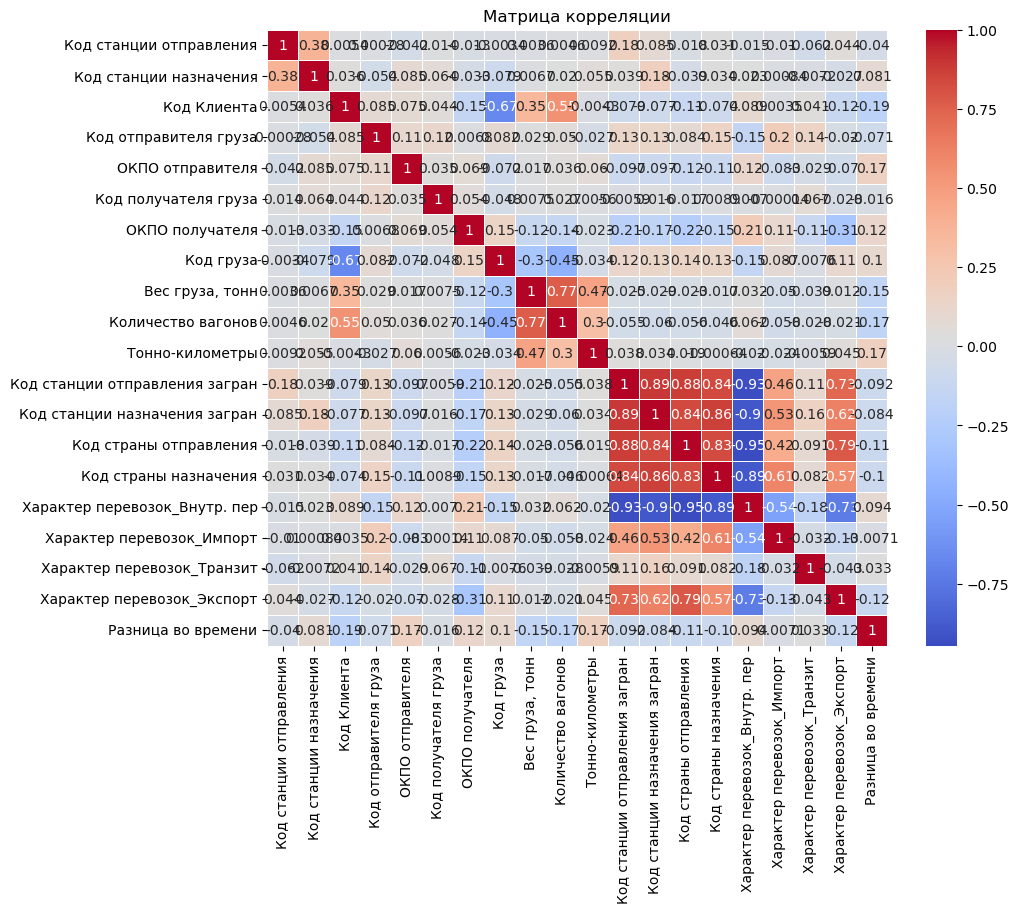

In [67]:
# Построение матрицы корреляции
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Матрица корреляции")
plt.show()

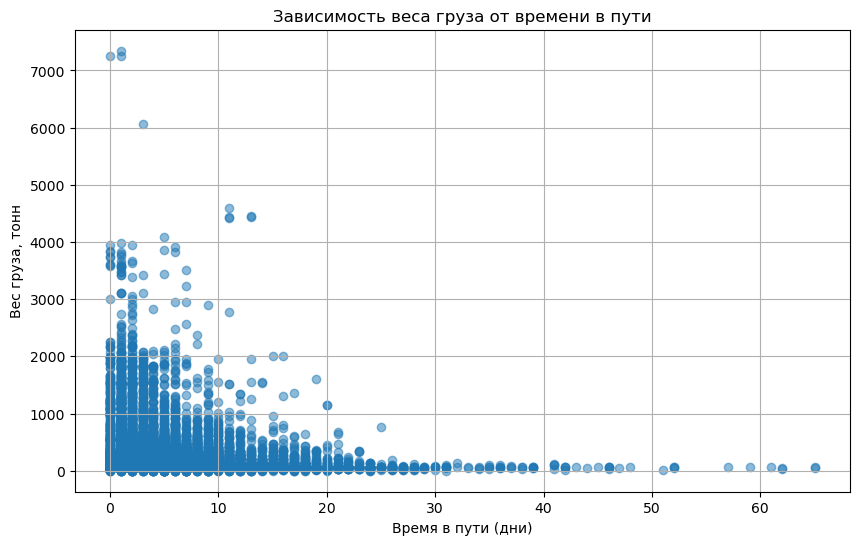

In [68]:
# Построение графика зависимости веса груза от времени в пути
plt.figure(figsize=(10, 6))
plt.scatter(df_encoded['Разница во времени'], df['Вес груза, тонн'], alpha=0.5)
plt.title('Зависимость веса груза от времени в пути')
plt.xlabel('Время в пути (дни)')
plt.ylabel('Вес груза, тонн')
plt.grid(True)
plt.show()

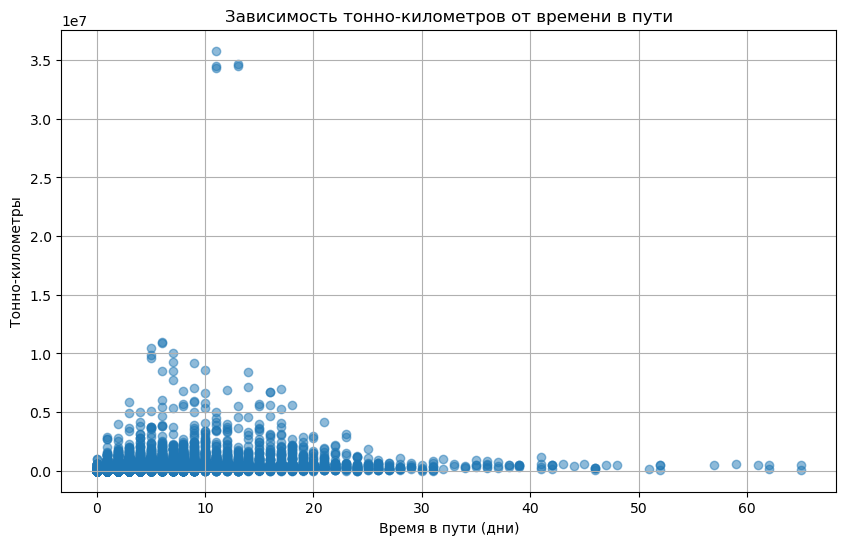

In [69]:
# Построение графика зависимости тонно-километров от времени в пути
plt.figure(figsize=(10, 6))
plt.scatter(df_encoded['Разница во времени'], df_encoded['Тонно-километры'], alpha=0.5)
plt.title('Зависимость тонно-километров от времени в пути')
plt.xlabel('Время в пути (дни)')
plt.ylabel('Тонно-километры')
plt.grid(True)
plt.show()

In [70]:
# Разделение данных на основе того, будет ли доставка больше 3 дней
X = df_encoded.drop(columns=['Разница во времени'])
y = (df_encoded['Разница во времени'] > 3).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
# Просмотр размерности наборов
print("Размер обучающего набора:", X_train.shape)
print("Размер тестового набора:", X_test.shape)

Размер обучающего набора: (24342, 19)
Размер тестового набора: (6086, 19)


In [29]:
# Загрузка необходимых библиотек
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive
from sklearn.model_selection import RepeatedKFold
from tpot import TPOTClassifier

In [17]:
# Настройка параметров tpot
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
tpot = TPOTClassifier(
    generations=5,
    population_size=50,
    scoring='accuracy',
    cv=cv,
    verbosity=2,
    random_state=1,
    n_jobs=-1
)

In [21]:
# Обучение auto-ml и получение параметров лучшей модели
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8712212894749674

Generation 2 - Current best internal CV score: 0.8712212894749674

Generation 3 - Current best internal CV score: 0.8790314568049492

Generation 4 - Current best internal CV score: 0.8790314568049492

Generation 5 - Current best internal CV score: 0.8798942993361714

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=True, criterion=gini, max_features=0.7000000000000001, min_samples_leaf=1, min_samples_split=12, n_estimators=100)


TPOTClassifier(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
               generations=5, n_jobs=-1, population_size=50, random_state=1,
               scoring='accuracy', verbosity=2)

In [31]:
# Проверка точности лучшей модели
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

best_model = ExtraTreesClassifier(bootstrap=True, criterion='gini', max_features=0.7000000000000001,
                                  min_samples_leaf=1, min_samples_split=12, n_estimators=25)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

y_train_pred = best_model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(accuracy_train)

Accuracy: 0.9015773907328295
0.9357078300879139


In [32]:
# Проверка модели LinearSVC 
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Создание модели LinearSVM
svc = LinearSVC()

# Обучение модели
svc.fit(X_train, y_train)

# Получение предсказаний для тестовых данных
y_pred = svc.predict(X_test)

# Рассчет точности
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

y_train_pred = svc.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(accuracy_train)

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy: 0.3103844889911272
0.3184619176731575


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [33]:
# Проверка модели RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Создание модели Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Обучение модели
rf_classifier.fit(X_train, y_train)

# Получение предсказаний для тестовых данных
y_pred = rf_classifier.predict(X_test)

# Рассчет точности
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

y_train_pred = rf_classifier.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(accuracy_train)

Accuracy: 0.8897469602366086
0.9984799934269986


In [34]:
# Проверка модели GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Создание модели 
gb_classifier = GradientBoostingClassifier()

# Обучение модели
gb_classifier.fit(X_train, y_train)

# Получение предсказаний для тестовых данных
y_pred = gb_classifier.predict(X_test)

# Рассчет точности
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

y_train_pred = gb_classifier.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(accuracy_train)

Accuracy: 0.8775879066710484
0.882343274997946


In [35]:
# Проверка модели CatBoost
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Создание модели
model = CatBoostClassifier(loss_function='Logloss')

# Обучение модели
model.fit(X_train, y_train, verbose=100)

# Получение предсказаний для тестовых данных
y_pred = model.predict(X_test)

# Рассчет точности
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

y_train_pred = model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(accuracy_train)

Learning rate set to 0.040263
0:	learn: 0.6620416	total: 152ms	remaining: 2m 31s
100:	learn: 0.2844747	total: 871ms	remaining: 7.75s
200:	learn: 0.2546437	total: 1.59s	remaining: 6.33s
300:	learn: 0.2356361	total: 2.25s	remaining: 5.22s
400:	learn: 0.2223116	total: 2.93s	remaining: 4.38s
500:	learn: 0.2123731	total: 3.63s	remaining: 3.61s
600:	learn: 0.2039463	total: 4.28s	remaining: 2.84s
700:	learn: 0.1971661	total: 4.95s	remaining: 2.11s
800:	learn: 0.1911658	total: 5.59s	remaining: 1.39s
900:	learn: 0.1860118	total: 6.24s	remaining: 685ms
999:	learn: 0.1812576	total: 6.88s	remaining: 0us
Accuracy: 0.9046993098915543
0.926669953167365


In [27]:
import shap
#SHAP для catboost
explainer_your_model = shap.Explainer(model)
shap_values_your_model = explainer_your_model.shap_values(X_test)

# SHAP для TPOT модели
explainer_tpot = shap.Explainer(best_model)
shap_values_tpot = explainer_tpot.shap_values(X_test)

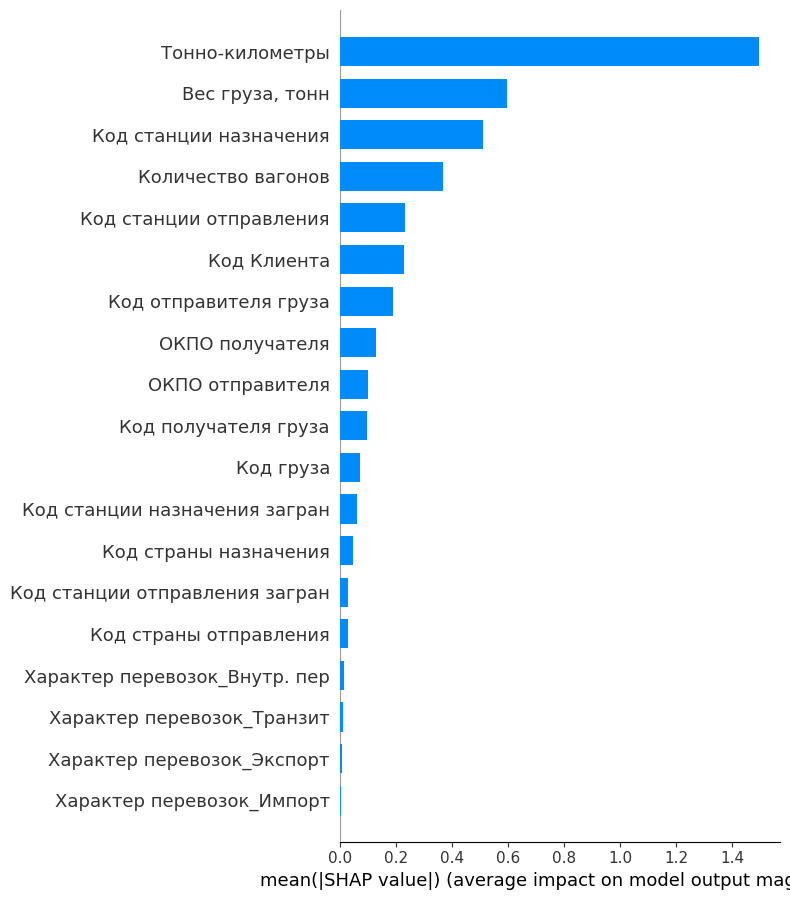

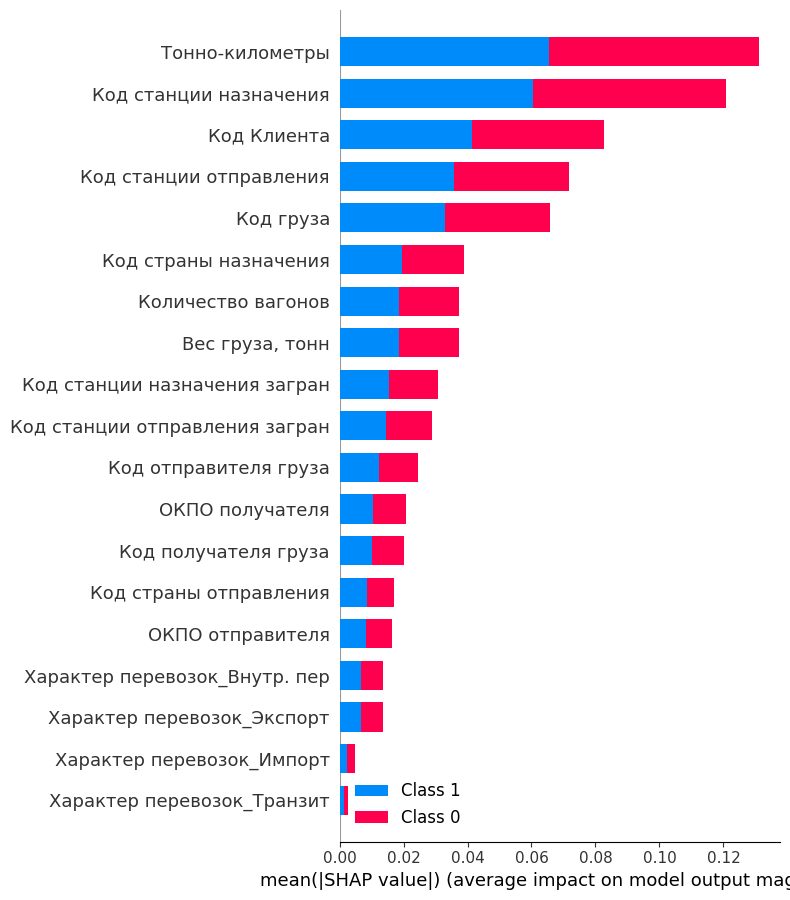

In [28]:
# График для нашей модели
shap.summary_plot(shap_values_your_model, X_test, feature_names=df_encoded.columns, plot_type="bar")

# График для TPOT модели
shap.summary_plot(shap_values_tpot, X_test, feature_names=df_encoded.columns, plot_type="bar")
# Графики показывают важность каждого признака для обучения

In [32]:
df_encoded

,Код станции отправления,Код станции назначения,Код Клиента,Код отправителя груза,ОКПО отправителя,Код получателя груза,ОКПО получателя,Код груза,"Вес груза, тонн",Количество вагонов,Тонно-километры,Код станции отправления загран,Код станции назначения загран,Код страны отправления,Код страны назначения,Характер перевозок_Внутр. пер,Характер перевозок_Импорт,Характер перевозок_Транзит,Характер перевозок_Экспорт,Разница во времени
0,86420,84480,1002743862,5003,5757676,5191,0,32411,67.460,1,45536,86420,71660,643,417,0,0,0,1,1
1,86420,84480,1002743862,5003,5757676,5191,0,32411,67.680,1,45684,86420,71660,643,417,0,0,0,1,2
2,86420,84480,1002743862,5003,5757676,5191,0,32411,265.350,4,179112,86420,71660,643,417,0,0,0,1,10
3,86420,84480,1002743862,5003,5757676,5244,50720107,32411,66.688,1,45014,86420,66160,643,398,0,0,0,1,2
4,86420,84480,1002743862,5003,5757676,5244,50720107,32411,67.520,1,45576,86420,66160,643,398,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36188,93460,93320,7000115305,9431,68594560,5368,68594560,32102,529.997,59,102306,0,0,0,0,1,0,0,0,1
36189,93460,93460,7000115305,9431,68594560,9431,68594560,32102,187.974,59,0,0,0,0,0,1,0,0,0,0
36190,94960,95050,7000117509,2481,1093050,2481,1093050,32102,30.600,18,2718,0,0,0,0,1,0,0,0,2
36191,65540,65540,7000117794,9913,69079506,9913,69079506,32102,208.010,62,0,0,0,0,0,1,0,0,0,2


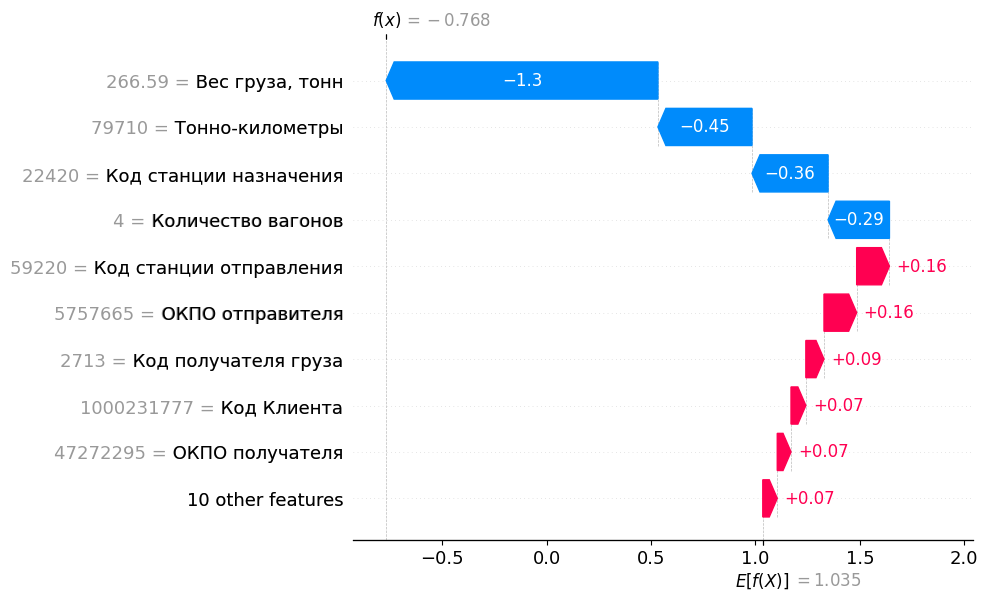

In [36]:
max_time = df_encoded['Разница во времени'].idxmax()

explainer = shap.Explainer(model)
shap_values = explainer(X)

# диаграмма “водопад” для наблюдения с самым большим временем
shap.plots.waterfall(shap_values[max_time])

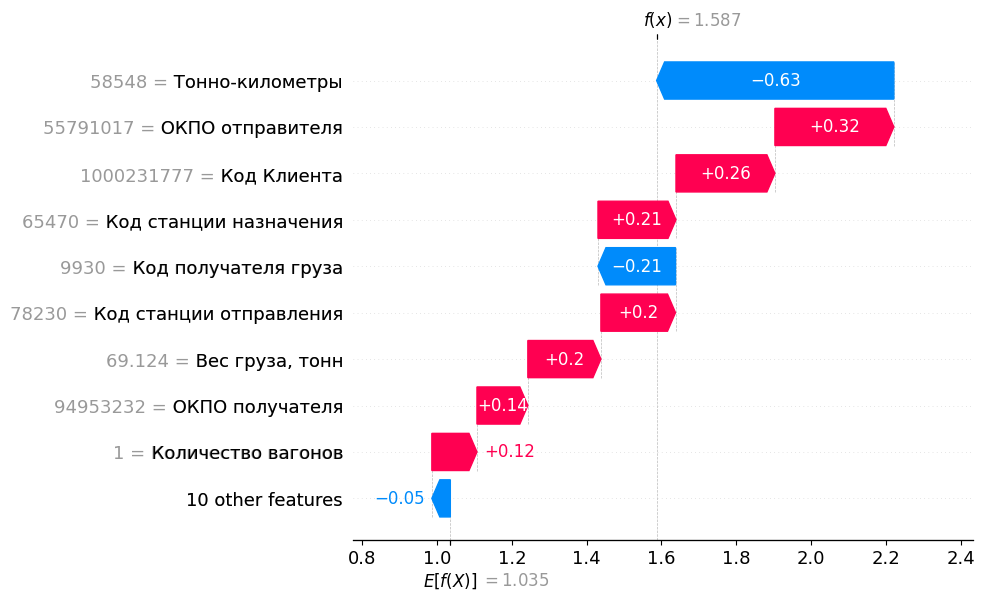

In [37]:
min_time = df_encoded['Разница во времени'].idxmin()

explainer = shap.Explainer(model)
shap_values = explainer(X)

# диаграмма “водопад” для наблюдения с самым меньшим временем
shap.plots.waterfall(shap_values[min_time])

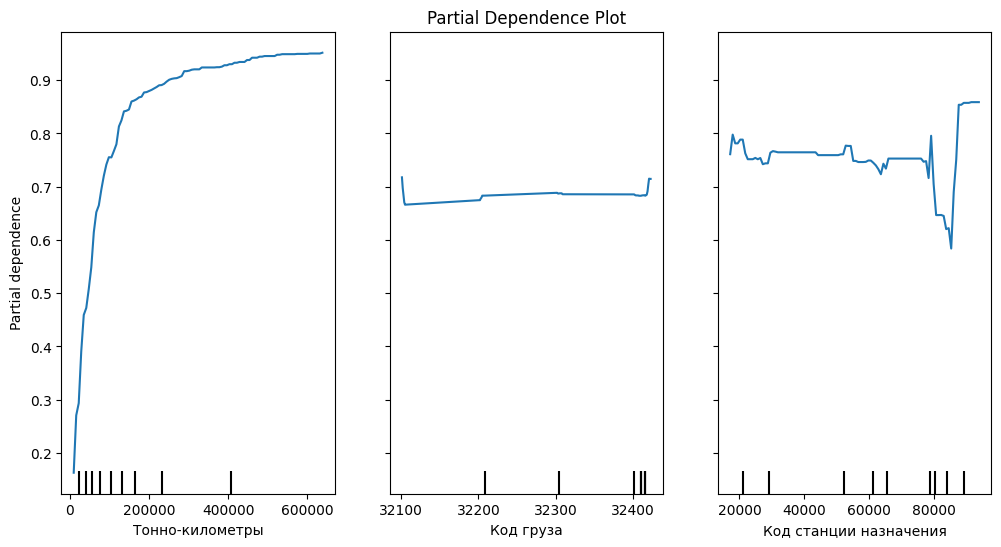

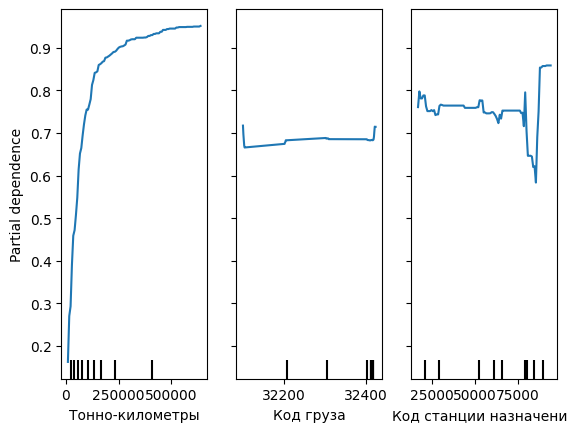

In [36]:
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence
fix, ax = plt.subplots(figsize=(12, 6))

display = PartialDependenceDisplay.from_estimator(
    model, X, ["Тонно-километры", "Код груза", "Код станции назначения"], ax=ax
)

ax.set_title("Partial Dependence Plot")
display.plot()

In [1]:
pip freeze

absl-py==1.3.0
aiosignal==1.3.1
antlr4-python3-runtime==4.9.3
anyio==3.7.1
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arrow==1.2.3
asttokens==2.0.8
astunparse==1.6.3
async-lru==2.0.4
attrs==23.1.0
Babel==2.12.1
backcall==0.2.0
beautifulsoup4==4.11.1
black==22.10.0
bleach==6.0.0
cachetools==5.2.0
catboost==1.2.2
certifi==2022.9.24
cffi==1.15.1
charset-normalizer==2.1.1
clearml==1.7.1
click==8.0.4
cloudpickle==2.2.0
colorama==0.4.5
colour==0.1.5
comm==0.1.4
contourpy==1.0.5
cycler==0.11.0
Cython==0.29.32
dacite==1.8.1
dataclasses==0.6
deap==1.4.1
debugpy==1.6.7
decorator==5.1.1
defusedxml==0.7.1
distlib==0.3.7
dtreeviz==2.2.2
et-xmlfile==1.1.0
exceptiongroup==1.1.2
executing==1.1.1
fastjsonschema==2.18.0
filelock==3.12.4
fire==0.4.0
FLAML==2.1.0
flatbuffers==22.9.24
fonttools==4.37.4
fqdn==1.5.1
frozenlist==1.4.0
furl==2.1.3
future==0.18.2
fvcore==0.1.5.post20220512
gast==0.5.3
google-auth==2.13.0
google-auth-oauthlib==0.4.6
google-pasta==0.2.0
graphviz==0.20.1
grpcio==1.49.1
h2o==